pandas.read_csv(filepath_or_buffer, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

In [1]:
import pandas as pd
file1 = '/Users/haowei/Documents/GN/Project/data_pool/Loan_data/LoanStats_2016Q1.csv'
file2 = '/Users/haowei/Documents/GN/Project/data_pool/311/Case_Data_from_San_Francisco_311__SF311_.csv'

def explore_file(file):
    df = pd.read_csv(file)
    #df = pd.read_csv(file, parse_dates= ['Opened','Closed','Updated'], infer_datetime_format=True)
    #df = pd.read_csv(file, skiprows=1,sep = ' ', error_bad_lines=False,skiprows=1, parse_dates= ['issue_d','last_pymnt_d', 'last_credit_pull_d'], infer_datetime_format=True)
    explore_df(df)
    return df

def read_csv_chunks_into_df(file_path, chunk_size, parse_date=False):    
    if parse_date:
        chunks = pd.read_csv(file_path, parse_dates= ['Opened','Closed','Updated'], infer_datetime_format=True, chunksize = chunk_size )
    else:
        chunks = pd.read_csv(file_path, chunksize = chunk_size )
    #df = chunks.get_chunk()
    df = pd.concat(chunks) 
    return df

def explore_df(df):
    print '*********** Shape of df **************'
    print df.shape
    features = df.columns.values    
    print '********** Number of features ***************'
    print len(features) 
    print '********** Features ***************'
    print features
    print '******* Head of df ******************'
    print df.head()
    print '******* Info of df ******************'
    print df.info()
    print '******** Description of df *****************'
    print df.describe()
    return
    
def get_unique(df):
    features = df.columns.values
    print '********* Number of unique values **********'
    for feature in features:
        print feature,' ', len(df[feature].unique())
    return 

def get_missing(df):
    print '********* Number of missing values **********'
    df2 = df.isnull()
    features = df.columns.values
    for feature in features:
        temp = df[df2[feature]]
        print feature,' ', len(temp)
        
# def value_counts(df):
#     features = df.columns.values
#     print '********* Counts of value **********'
#     for feature in features:
#         print feature,' ', len(df[feature].unique())
#     return 

def drop_na_row(df,feature):
    df = df.ix[df[feature].notnull(), :]
    return df

def get_value_counts(df, feature_list):
    for feature in feature_list:
        print '************ '+feature+' value counts ***********'
        print df[feature].value_counts(dropna = False)
    return

def to_datetime(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col])
    return df

In [6]:
df = read_csv_chunks_into_df(file2,10000, parse_date=False)
# explore_df(df)

In [3]:
# get_unique(df)

In [4]:
# get_missing(df)

In [7]:
dt_list = ['Opened','Closed','Updated'] 
dft = df.iloc[:10000,:]
dft = to_datetime(dft, dt_list)
dft.head(3)


/Users/haowei/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,322571,2008-11-30 23:53:00,2008-12-01 15:19:00,2008-12-01 15:19:00,Closed,NaN,PUC - Electric/Power - G,General Requests,puc - electric - request_for_service,puc - electric - request_for_service,Intersection of 21ST ST and CAPP ST,9.0,Mission,"(37.7571008516766, -122.417811874214)",Voice In,NaN
1,322568,2008-11-30 23:13:00,2009-07-21 16:24:00,2009-07-21 16:24:00,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Posting_Too_Large_in_Size,Posting_Too_Large_in_Size on Sidewalk,Intersection of BUSH ST and VAN NESS AVE,3.0,Nob Hill,"(37.7884895281133, -122.421948485141)",Voice In,NaN
2,322567,2008-11-30 23:07:00,2008-12-27 06:07:00,2008-12-27 06:07:00,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Affixed_Improperly,Affixed_Improperly on Sidewalk,Intersection of EUCLID AVE and MASONIC AVE,2.0,Western Addition,"(37.7850837365507, -122.447620029034)",Voice In,NaN


In [ ]:
#dft.info()

In [8]:
import numpy as np
from collections import defaultdict
def days_to_minutes(td):
    return  td.total_seconds()//60#(td.seconds//60)%60

def days_to_hours(td):
    hours = td.total_seconds()/3600#(td.seconds//60)%60
    return np.round(hours,1)

dft1 = dft.copy()
dft1['Process_time'] = dft1['Closed'] - dft1['Opened']
dft1 = dft1[dft1['Process_time'].notnull()]
dft1['Process_minutes'] = dft1['Process_time'].apply(days_to_minutes)
dft1['Process_hours'] = dft1['Process_time'].apply(days_to_hours)

def get_sorted_category_value(df, category):
    ''' returns sorted categorical values based on the mean process_hours '''
    dfm = df.groupby(category).mean()
    dfm = dfm.sort_values('Process_hours')
    return dfm.index

def category_to_numer_dict(df, category, values):
    '''Change a categorical column to numeric and save the categorical values in a dictionary for later reference'''
    dict = defaultdict(str)
    for i,value in enumerate(values):
        dict[i] = value # store the categorical values in a dictionary for later reference
        df.ix[df[category]==value, category] = i
    return dict

# def category_to_numer(df, category):
#     values = df[category].unique()
#     for i,value in enumerator(values):
#         df.ix[df[category]==value, category] = i
#     return df
#dft.ix[df['Category']=='Illegal Postings', 'Category'] = 1


dft1.head()


    

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL,Process_time,Process_minutes,Process_hours
0,322571,2008-11-30 23:53:00,2008-12-01 15:19:00,2008-12-01 15:19:00,Closed,NaN,PUC - Electric/Power - G,General Requests,puc - electric - request_for_service,puc - electric - request_for_service,Intersection of 21ST ST and CAPP ST,9.0,Mission,"(37.7571008516766, -122.417811874214)",Voice In,NaN,0 days 15:26:00,926.0,15.4
1,322568,2008-11-30 23:13:00,2009-07-21 16:24:00,2009-07-21 16:24:00,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Posting_Too_Large_in_Size,Posting_Too_Large_in_Size on Sidewalk,Intersection of BUSH ST and VAN NESS AVE,3.0,Nob Hill,"(37.7884895281133, -122.421948485141)",Voice In,NaN,232 days 17:11:00,335111.0,5585.2
2,322567,2008-11-30 23:07:00,2008-12-27 06:07:00,2008-12-27 06:07:00,Closed,NaN,DPW Ops Queue,Illegal Postings,Illegal Postings - Affixed_Improperly,Affixed_Improperly on Sidewalk,Intersection of EUCLID AVE and MASONIC AVE,2.0,Western Addition,"(37.7850837365507, -122.447620029034)",Voice In,NaN,26 days 07:00:00,37860.0,631.0
3,322566,2008-11-30 22:56:00,2009-07-21 16:24:00,2009-07-21 16:24:00,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,"1566 HYDE ST, SAN FRANCISCO, CA, 94109",3.0,Nob Hill,"(37.795328529, -122.418067787)",Voice In,NaN,232 days 17:28:00,335128.0,5585.5
4,322565,2008-11-30 22:46:00,2008-12-13 10:50:00,2008-12-13 10:50:00,Closed,NaN,RPD Park Service Area GGP Queue,Rec and Park Requests,Park - Structural_Maintenance,Other,"GGP Panhandle, SAN FRANCISCO, CA, 94117",5.0,Haight Ashbury,"(37.772204762, -122.4487004)",Voice In,NaN,12 days 12:04:00,18004.0,300.1


In [10]:
cate_val = get_sorted_category_value(dft1,'Category')
req_type_val = get_sorted_category_value(dft1,'Request Type')

dft_cat_dict = category_to_numer_dict(dft1, 'Category',cate_val)
dft_req_type_dict = category_to_numer_dict(dft1, 'Request Type', req_type_val)

# dfm = dft1.groupby('Category').mean() 
# dfm = dfm.sort_values('Process_hours')

In [ ]:
# dfm.index

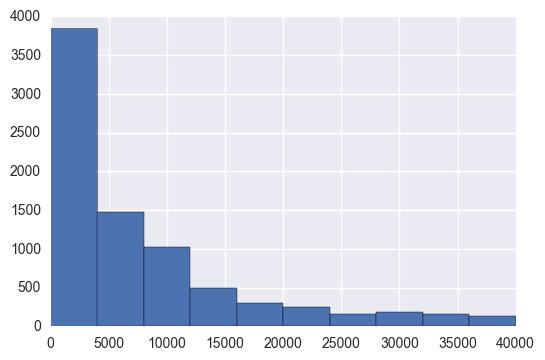

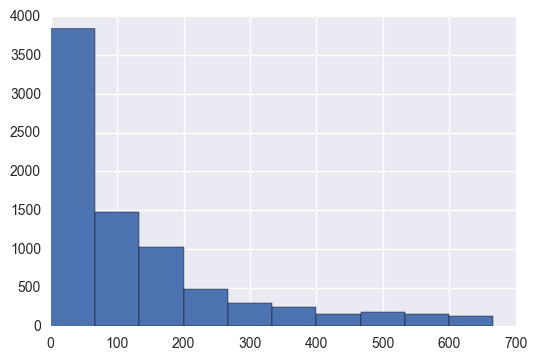

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

dft_norm = dft1[dft1.Process_minutes<40000]
dft_norm.Process_minutes.hist(bins=10)
plt.show()
dft_norm.Process_hours.hist()
plt.show()



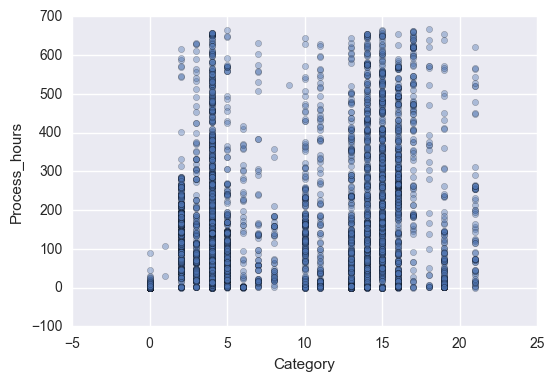

In [12]:
dft_norm.plot(kind = 'scatter', x='Category', y='Process_hours', alpha = 0.4)

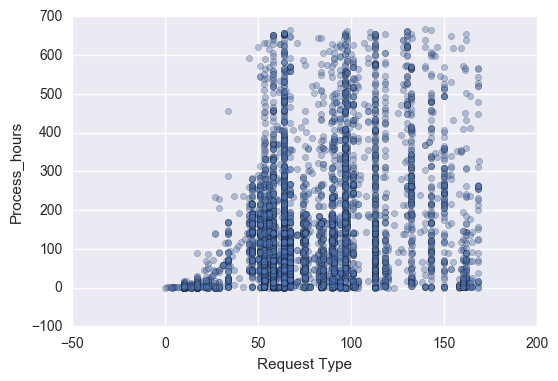

In [13]:
dft_norm.plot(kind = 'scatter', x='Request Type', y='Process_hours', alpha = 0.4)

CaseID   2092917
Opened   2029272
Closed   1485294
Updated   1570351
Status   2
Status Notes   348637
Responsible Agency   409
Category   28
Request Type   1419
Request Details   133593
Address   199413
Supervisor District   14
Neighborhood   126
Point   217287
Source   9
Media URL   377721

In [ ]:
explore_list = ['Status','Status Notes', 'Responsible Agency', 'Category', \
                 'Request Type', 'Request Details', 'Address', 'Supervisor District', \
                 'Neighborhood', 'Point', 'Source', 'Media URL' ]   
short_explore_list = ['Status', 'Responsible Agency', 'Category', 'Neighborhood', 'Source']
                       
get_value_counts(df, explore_list )